In [1]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt

In [41]:
csv_path = 'data/VPA_Open_Space.csv'

read_csv = pd.read_csv(csv_path)

information_df = pd.DataFrame(read_csv)

information_df.head()

,FID,LGA,VM_PARCEL_,VM_PARCE_1,DATA_SOURC,OS_CATEGOR,OS_CATEG_2,OWNER_TYPE,PARK_NAME,OS_STATUS,...,VEAC_ID,WATER_BODY,OS_TYPE,COASTAL,MANAGER_NA,OWNER_NAME,Image_URL,VPA_ID,SHAPE_Length,SHAPE_Area
0,1,BOROONDARA,3\LP28215,95086,VM Features of Interest,Tertiary institutions,Not applicable,State Government,Swinburne University Of Technology & Tafe Divi...,Existing,...,,,Restricted public land,,NO DATA,Swinburne University of Technology,https://lh3.googleusercontent.com/-QP2NylEZuhE...,1500,0.000742,1.698581e-08
1,2,BOROONDARA,159\LP5481,203973157,VM Parcels,Parks and gardens,Not applicable,Local government,Kate Campbell Reserve,Existing,...,,,Public open space,,NO DATA,Boroondara City Council,https://lh3.googleusercontent.com/-rdTUgqfNyXg...,1501,0.001105,6.526377e-08
2,3,BOROONDARA,3\TP84208,203973089,VM Parcels,Parks and gardens,Not applicable,Local government,Kate Campbell Reserve,Existing,...,,,Public open space,,NO DATA,Boroondara City Council,https://lh3.googleusercontent.com/-rdTUgqfNyXg...,1502,0.001003,5.615414e-08
3,4,BOROONDARA,1\TP84208,203973073,VM Parcels,Parks and gardens,Not applicable,Local government,Kate Campbell Reserve,Existing,...,,,Public open space,,NO DATA,Boroondara City Council,https://lh3.googleusercontent.com/-rdTUgqfNyXg...,1503,0.001102,6.530917e-08
4,5,BOROONDARA,1\TP802753,203972979,VM Parcels,Parks and gardens,Not applicable,Local government,Kate Campbell Reserve,Existing,...,,,Public open space,,NO DATA,Boroondara City Council,https://lh3.googleusercontent.com/-rdTUgqfNyXg...,1504,0.001327,9.438898e-08


In [3]:
park_query = ['State Government', 'Local government']

information_df_parks_df = information_df.loc[(information_df['OS_CATEGOR'] == 'Parks and gardens') &
                                            (information_df['OS_TYPE'] == 'Public open space')]
information_df_parks_df.head()

,FID,LGA,VM_PARCEL_,VM_PARCE_1,DATA_SOURC,OS_CATEGOR,OS_CATEG_2,OWNER_TYPE,PARK_NAME,OS_STATUS,...,VEAC_ID,WATER_BODY,OS_TYPE,COASTAL,MANAGER_NA,OWNER_NAME,Image_URL,VPA_ID,SHAPE_Length,SHAPE_Area
1,2,BOROONDARA,159\LP5481,203973157,VM Parcels,Parks and gardens,Not applicable,Local government,Kate Campbell Reserve,Existing,...,,,Public open space,,NO DATA,Boroondara City Council,https://lh3.googleusercontent.com/-rdTUgqfNyXg...,1501,0.001105,6.526377e-08
2,3,BOROONDARA,3\TP84208,203973089,VM Parcels,Parks and gardens,Not applicable,Local government,Kate Campbell Reserve,Existing,...,,,Public open space,,NO DATA,Boroondara City Council,https://lh3.googleusercontent.com/-rdTUgqfNyXg...,1502,0.001003,5.615414e-08
3,4,BOROONDARA,1\TP84208,203973073,VM Parcels,Parks and gardens,Not applicable,Local government,Kate Campbell Reserve,Existing,...,,,Public open space,,NO DATA,Boroondara City Council,https://lh3.googleusercontent.com/-rdTUgqfNyXg...,1503,0.001102,6.530917e-08
4,5,BOROONDARA,1\TP802753,203972979,VM Parcels,Parks and gardens,Not applicable,Local government,Kate Campbell Reserve,Existing,...,,,Public open space,,NO DATA,Boroondara City Council,https://lh3.googleusercontent.com/-rdTUgqfNyXg...,1504,0.001327,9.438898e-08
12,13,BOROONDARA,1\TP178035,88229,VM Parcels,Parks and gardens,Not applicable,Local government,Hays Paddock,Existing,...,,,Public open space,,NO DATA,Boroondara City Council,https://lh3.googleusercontent.com/-rdTUgqfNyXg...,1512,0.001186,7.312569e-08


In [4]:
information_df_parks_df['LGA'].value_counts()

CASEY                576
MORNINGTON           500
WHITTLESEA           484
KINGSTON             384
WHITEHORSE           366
HUME                 356
MORELAND             350
WYNDHAM              333
YARRA RANGES         323
MONASH               312
FRANKSTON            303
BRIMBANK             300
MELBOURNE            299
BOROONDARA           290
MANNINGHAM           278
MELTON               273
KNOX                 248
NILLUMBIK            241
GREATER DANDENONG    206
BANYULE              189
CARDINIA             189
MAROONDAH            184
MOONEE VALLEY        176
HOBSONS BAY          167
YARRA                166
MARIBYRNONG          161
PORT PHILLIP         157
DAREBIN              138
STONNINGTON          128
GLEN EIRA             76
MITCHELL              51
BAYSIDE               49
Name: LGA, dtype: int64

In [32]:
lga_list = pd.DataFrame(information_df_parks_df.groupby('LGA')['PARK_NAME'].count().sort_values(ascending = False).index)
lga_list

lga_bucket = []

for i in range(len(lga_list)):
    lga_bucket.append(str(lga_list['LGA'][i].title()))
    
lga_bucket

['Casey',
 'Mornington',
 'Whittlesea',
 'Kingston',
 'Whitehorse',
 'Hume',
 'Moreland',
 'Wyndham',
 'Yarra Ranges',
 'Monash',
 'Frankston',
 'Brimbank',
 'Melbourne',
 'Boroondara',
 'Manningham',
 'Melton',
 'Knox',
 'Nillumbik',
 'Greater Dandenong',
 'Banyule',
 'Cardinia',
 'Maroondah',
 'Moonee Valley',
 'Hobsons Bay',
 'Yarra',
 'Maribyrnong',
 'Port Phillip',
 'Darebin',
 'Stonnington',
 'Glen Eira',
 'Mitchell',
 'Bayside']

In [6]:
lga_park_count = pd.DataFrame(information_df_parks_df.groupby('LGA')['PARK_NAME'].count().sort_values(ascending = False))
lga_park_count = lga_park_count['PARK_NAME'].reset_index('LGA')
lga_park_count

park_count = []

for i in range(len(lga_park_count)):
    park_count.append(int(lga_park_count['PARK_NAME'][i]))
    
park_count

[576,
 498,
 484,
 384,
 366,
 356,
 350,
 333,
 323,
 312,
 303,
 300,
 299,
 290,
 278,
 273,
 248,
 241,
 206,
 189,
 189,
 184,
 176,
 167,
 166,
 161,
 157,
 138,
 128,
 76,
 51,
 49]

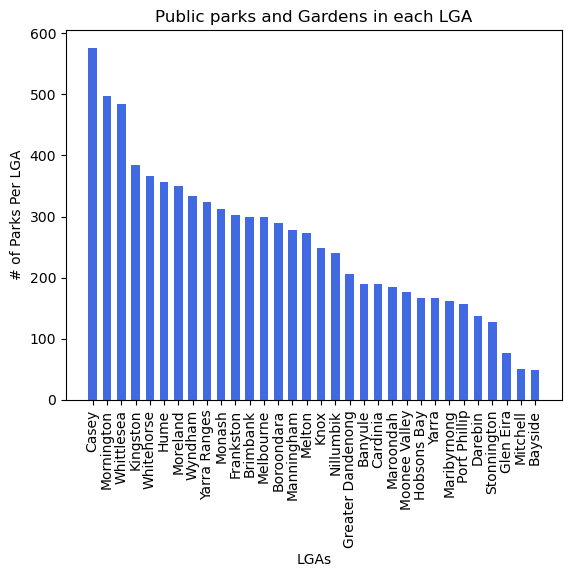

In [7]:
x_axis = np.arange(len(lga_bucket))

plt.bar(x_axis, park_count, color="royalblue", align="center", width = 0.6)
tick_locations = [value for value in x_axis]
tick_locations
plt.xticks(tick_locations, lga_bucket, rotation = 90)
plt.xlabel('LGAs')
plt.ylabel('# of Parks Per LGA')
plt.title('Public parks and Gardens in each LGA')

plt.show()

In [8]:
lga_park_count_df = pd.DataFrame({"Local Government Area" : lga_bucket, 
                                  "Public Open Parks" : park_count})
lga_park_count_df

,Local Government Area,Public Open Parks
0,Casey,576
1,Mornington,498
2,Whittlesea,484
3,Kingston,384
4,Whitehorse,366
5,Hume,356
6,Moreland,350
7,Wyndham,333
8,Yarra Ranges,323
9,Monash,312


In [9]:
column_names = ['LGA code', 'Local Government Area', '22 Population', 'Area (km2)', 'Population Density (persons/km2)'
            ]

lga_information_path = pd.read_excel('data/LGA_ABS_data_21_22.xlsx', 
                                     sheet_name = 2, 
                                     header = 7,
                                     names = column_names,
                                     usecols = 'A,B,D,M,N',
                                     skiprows = 1,
                                     na_values = 0)
lga_information = pd.DataFrame(lga_information_path)
lga_information

,LGA code,Local Government Area,22 Population,Area (km2),Population Density (persons/km2)
0,20110,Alpine,13187.0,4788.2,2.8
1,20260,Ararat,11754.0,4211.1,2.8
2,20570,Ballarat,115951.0,739.0,156.9
3,20660,Banyule,127348.0,62.5,2036.3
4,20740,Bass Coast,41798.0,865.8,48.3
...,...,...,...,...,...
83,NaN,NaN,NaN,NaN,NaN
84,NaN,NaN,NaN,NaN,NaN
85,"Source: Regional population, 2021-22",NaN,NaN,NaN,NaN
86,NaN,NaN,NaN,NaN,NaN


In [38]:
lga_information_cleaned = lga_information.dropna(how = 'any')
lga_information_cleaned

,LGA code,Local Government Area,22 Population,Area (km2),Population Density (persons/km2)
0,20110,Alpine,13187.0,4788.2,2.8
1,20260,Ararat,11754.0,4211.1,2.8
2,20570,Ballarat,115951.0,739.0,156.9
3,20660,Banyule,127348.0,62.5,2036.3
4,20740,Bass Coast,41798.0,865.8,48.3
...,...,...,...,...,...
75,27260,Wyndham,309125.0,542.1,570.2
76,27350,Yarra,92301.0,19.5,4723.2
77,27450,Yarra Ranges,157388.0,2468.2,63.8
78,27630,Yarriambiack,6435.0,7325.8,0.9


In [11]:
lga_filtered = lga_information_cleaned.loc[lga_information_cleaned['Local Government Area'].isin(lga_bucket)]
lga_filtered = lga_filtered.reset_index(drop = True)
lga_filtered

,LGA code,Local Government Area,22 Population,Area (km2),Population Density (persons/km2)
0,20660,Banyule,127348.0,62.5,2036.3
1,21110,Boroondara,169500.0,60.2,2816.7
2,21180,Brimbank,193256.0,123.4,1566.1
3,21450,Cardinia,123104.0,1282.6,96.0
4,21610,Casey,378831.0,409.4,925.3
5,21890,Darebin,150483.0,53.5,2814.3
6,22170,Frankston,141078.0,129.6,1088.6
7,22310,Glen Eira,151694.0,38.7,3920.7
8,22670,Greater Dandenong,159151.0,129.5,1228.5
9,23110,Hobsons Bay,91803.0,64.2,1429.1


In [37]:
new_lga = []

for name in lga_filtered['Local Government Area']:
    new_lga.append(str(name))
    
len(new_lga)

29

In [36]:
sorted_lga_bucket = sorted(lga_bucket)
len(sorted_lga_bucket)

32